<h1 style="text-align:center">cab booking cancellation prediction</h1>

In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import cross_validation
import math
import datetime
import time
import multiprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read the file from csv
cars_train = pd.read_csv('Kaggle_YourCabs_training.csv')

In [3]:
y = cars_train.pop("Car_Cancellation")

In [4]:
cars_train.describe()

C:\Users\Tushar\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.150000
25%,145778.000000,24614.000000,12.00000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
50%,159248.000000,31627.000000,12.00000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
75%,172578.500000,39167.000000,24.00000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,100.000000


In [5]:
cars_train.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,1.0


In [6]:
cars_train.isnull().any()

id                     False
user_id                False
vehicle_model_id       False
package_id              True
travel_type_id         False
from_area_id            True
to_area_id              True
from_city_id            True
to_city_id              True
from_date              False
to_date                 True
online_booking         False
mobile_site_booking    False
booking_created        False
from_lat                True
from_long               True
to_lat                  True
to_long                 True
Cost_of_error          False
dtype: bool

In [7]:
columns = cars_train.columns

for column in columns:
    print column
    print cars_train[column].value_counts()
    print


id
133119    1
158983    1
185616    1
142607    1
140558    1
146701    1
144652    1
134411    1
138505    1
136456    1
156934    1
185648    1
161028    1
150787    1
148738    1
154881    1
152832    1
175359    1
173310    1
179453    1
183571    1
169240    1
171289    1
165146    1
146733    1
144684    1
134443    1
138537    1
136488    1
159015    1
         ..
170598    1
164453    1
166500    1
178786    1
172641    1
174688    1
152159    1
154206    1
158328    1
162426    1
135831    1
160379    1
137878    1
133780    1
144019    1
139921    1
141968    1
184975    1
180877    1
182924    1
168583    1
164485    1
166532    1
176771    1
172673    1
174720    1
154238    1
148093    1
150140    1
133121    1
Name: id, dtype: int64

user_id
29648    471
868      245
27458    211
32527    202
34972    198
33002    187
29275    185
32023    125
30290    120
38538    105
40512    104
37192    102
20570     96
41512     95
20598     86
29184     84
17664     78
24042     75

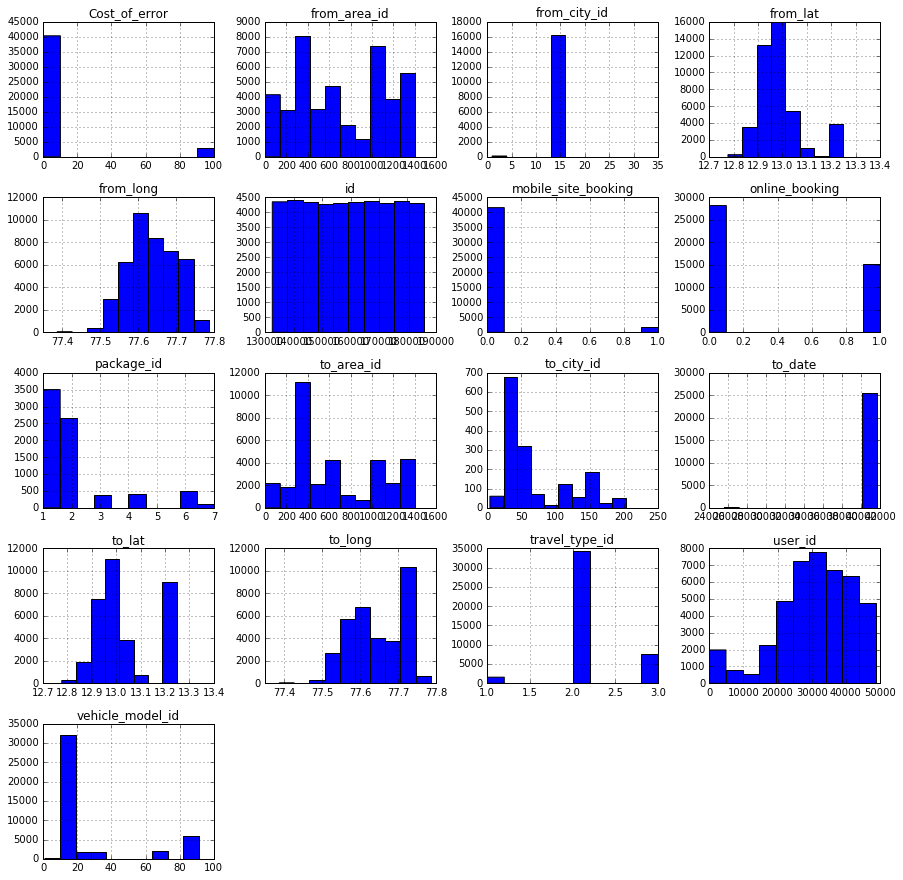

In [8]:
pd.DataFrame.hist(cars_train, figsize = [15,15]);

<h2>Handle Missing Values</h2>

In [9]:
#fill all the null values with 0.
null_columns=['package_id', 'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_date', 'from_lat', 'from_long', 'to_lat', 'to_long']
for data in null_columns:
    cars_train[data].fillna(0, inplace=True)

In [10]:
#check all Null values is filled or not
cars_train.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Cost_of_error
count,43431.000000,43431.000000,43431.00000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,0.352905,2.137252,713.096682,528.628215,5.613203,2.505998,24410.103046,0.351592,0.043241,12.954661,77.470010,10.285806,61.304804,8.000509
std,15442.386279,10996.476709,26.79825,0.981477,0.437712,420.686842,448.557662,7.261237,16.012431,20430.985776,0.477473,0.203402,0.606228,3.589261,5.310611,31.646308,25.350698
min,132512.000000,16.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,0.000000,2.000000,393.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.926450,77.592806,12.889630,77.546250,1.000000
50%,159248.000000,31627.000000,12.00000,0.000000,2.000000,590.000000,393.000000,0.000000,0.000000,41464.562500,0.000000,0.000000,12.967990,77.635750,12.970030,77.606805,1.000000
75%,172578.500000,39167.000000,24.00000,0.000000,2.000000,1089.000000,977.000000,15.000000,0.000000,41528.750170,1.000000,0.000000,13.006450,77.687790,13.032410,77.706880,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,100.000000


<h2>Model Creation</h2>

In [11]:
cars_train.drop(["Cost_of_error"], axis=1, inplace=True)

In [12]:
#numerical variable are selected which if of object type and test and train data is generated
numeric_variables = list(cars_train.dtypes[cars_train.dtypes != "object"].index)
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(cars_train[numeric_variables], y, test_size=.2)

In [13]:
model = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=72)
model.fit(X_train, y_train)
roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.614804808403


<span style="color:green">AUC 0.614804808403 is not good for out dataset. But we have good benchmark and we need to clean out data set to improve our AUC score</span>

In [14]:
#lets see which of the variable is categorical
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [15]:
describe_categorical(cars_train)

,from_date,booking_created
count,43431,43431
unique,20377,39349
top,10/12/2013 6:00,10/31/2013 10:30
freq,20,18


<span style="color:green">We have a two categorical column <b>from_date</b> and <b>booking_created</b> which may affect the cab cancellation. Because if more number of days are remaining user might cancel the cab and go for the cheaper cab. So we have to calculate the days remaining and add to the dataset</span>

In [35]:
#calculate the days remaining
def no_of_days_remaning(X):
    days_remaining=[]
    for i in range(0, X.shape[0], 1):
        from_date=datetime.datetime.strptime(X.from_date.get_value(i), '%m/%d/%Y %H:%M')
        booking_date=datetime.datetime.strptime(X.booking_created.get_value(i), '%m/%d/%Y %H:%M')
        diff=from_date-booking_date
        days_remaining.append(diff.days)
    return days_remaining

In [36]:
cars_train['days_remaining']=no_of_days_remaning(cars_train)

In [46]:
#function to splite date time and hours
def split_date_time_hours(date_col):
    months=[]
    days=[]
    hours=[]
    for i in range(0, cars_train.shape[0], 1):
        value = date_col.get_value(i)
        seconds= int(time.mktime(time.strptime(value, '%m/%d/%Y %H:%M'))) - time.timezone
        timeStamp=time.strftime("%a,%d %b %Y %H:%M:%S", time.gmtime(seconds))
        #d, m, s= handle_date(date_col.get_value(i))
        d=timeStamp.split(',')[0]
        m=timeStamp.split(',')[1].split(' ')[1]
        s=timeStamp.split(',')[1].split(' ')[3].split(":")[0]
        months.append(m)
        days.append(d)
        hours.append(s)
    return months, days, hours

In [49]:
#split into month, day, time column
from_month, from_weekday, from_time = split_date_time_hours(cars_train.from_date)
cars_train['from_month']=from_month
cars_train['from_weekday']=from_weekday
cars_train['from_time']=from_time
cars_train.drop(["from_date"], axis=1, inplace=True)


In [51]:
booking_month, booking_weekday, booking_time=split_date_time_hours(cars_train.booking_created)
cars_train['booking_month']=booking_month
cars_train['booking_weekday']=booking_weekday
cars_train['booking_time']=booking_time
cars_train.drop(["booking_created"], axis=1, inplace=True)

In [52]:
#dropping unwanted variables
cars_train.drop(["id", "user_id", "to_date"], axis=1, inplace=True)

In [53]:
#handle categorical variable
categorical_variables = ['from_month', 'from_weekday', 'booking_month', 'booking_weekday', 'vehicle_model_id', 'package_id', 'travel_type_id', 'from_city_id', 'online_booking', 'mobile_site_booking', 'to_city_id']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(cars_train[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    cars_train = pd.concat([cars_train, dummies], axis=1)
    cars_train.drop([variable], axis=1, inplace=True)

In [55]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(cars_train)

,from_area_id,to_area_id,from_lat,from_long,to_lat,to_long,days_remaining,from_time,booking_time,from_month_Apr,from_month_Aug,from_month_Dec,from_month_Feb,from_month_Jan,from_month_Jul,from_month_Jun,from_month_Mar,from_month_May,from_month_Nov,from_month_Oct,from_month_Sep,from_weekday_Fri,from_weekday_Mon,from_weekday_Sat,from_weekday_Sun,from_weekday_Thu,from_weekday_Tue,from_weekday_Wed,booking_month_Apr,booking_month_Aug,booking_month_Feb,booking_month_Jan,booking_month_Jul,booking_month_Jun,booking_month_Mar,booking_month_May,booking_month_Nov,booking_month_Oct,booking_month_Sep,booking_weekday_Fri,booking_weekday_Mon,booking_weekday_Sat,booking_weekday_Sun,booking_weekday_Thu,booking_weekday_Tue,booking_weekday_Wed,vehicle_model_id_1,vehicle_model_id_10,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,package_id_0.0,package_id_1.0,package_id_2.0,package_id_3.0,package_id_4.0,package_id_5.0,package_id_6.0,package_id_7.0,travel_type_id_1,travel_type_id_2,travel_type_id_3,from_city_id_0.0,from_city_id_1.0,from_city_id_15.0,from_city_id_31.0,online_booking_0,online_booking_1,mobile_site_booking_0,mobile_site_booking_1,to_city_id_0.0,to_city_id_4.0,to_city_id_5.0,to_city_id_8.0,to_city_id_10.0,to_city_id_11.0,to_city_id_12.0,to_city_id_13.0,to_city_id_14.0,to_city_id_16.0,to_city_id_17.0,to_city_id_18.0,to_city_id_20.0,to_city_id_23.0,to_city_id_24.0,to_city_id_25.0,to_city_id_28.0,to_city_id_29.0,to_city_id_30.0,to_city_id_31.0,to_city_id_32.0,to_city_id_36.0,to_city_id_37.0,to_city_id_41.0,to_city_id_42.0,to_city_id_44.0,to_city_id_45.0,to_city_id_48.0,to_city_id_49.0,to_city_id_50.0,to_city_id_51.0,to_city_id_52.0,to_city_id_53.0,to_city_id_55.0,to_city_id_56.0,to_city_id_57.0,to_city_id_58.0,to_city_id_60.0,to_city_id_61.0,to_city_id_62.0,to_city_id_64.0,to_city_id_65.0,to_city_id_66.0,to_city_id_67.0,to_city_id_68.0,to_city_id_69.0,to_city_id_72.0,to_city_id_75.0,to_city_id_76.0,to_city_id_77.0,to_city_id_80.0,to_city_id_82.0,to_city_id_85.0,to_city_id_88.0,to_city_id_89.0,to_city_id_94.0,to_city_id_97.0,to_city_id_108.0,to_city_id_109.0,to_city_id_110.0,to_city_id_111.0,to_city_id_113.0,to_city_id_114.0,to_city_id_115.0,to_city_id_116.0,to_city_id_119.0,to_city_id_120.0,to_city_id_121.0,to_city_id_125.0,to_city_id_126.0,to_city_id_131.0,to_city_id_132.0,to_city_id_133.0,to_city_id_134.0,to_city_id_135.0,to_city_id_137.0,to_city_id_139.0,to_city_id_142.0,to_city_id_144.0,to_city_id_146.0,to_city_id_147.0,to_city_id_148.0,to_city_id_149.0,to_city_id_151.0,to_city_id_152.0,to_city_id_154.0,to_city_id_157.0,to_city_id_160.0,to_city_id_161.0,to_city_id_162.0,to_city_id_163.0,to_city_id_164.0,to_city_id_165.0,to_city_id_166.0,to_city_id_167.0,to_city_id_168.0,to_city_id_169.0,to_city_id_170.0,to_city_id_172.0,to_city_id_173.0,to_city_id_176.0,to_city_id_178.0,to_city_id_179.0,to_city_id_182.0,to_city_id_184.0,to_city_id_185.0,to_city_id_186.0,to_city_id_187.0,to_city_id_189.0,to_city_id_190.0,to_city_id_191.0,to_city_id_192.0,to_city_id_196.0,to_city_id_197.0,to_city_id_198.0,to_city_id_200.0,to_city_id_203.0
0,83.0,448.0,12.924150,77.672290,12.927320,77.635750,0,02,01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [56]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(cars_train, y, test_size=.2)
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=72)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.607466638907


In [57]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [58]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
best_rfc = estimator.best_estimator_

C:\Users\Tushar\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


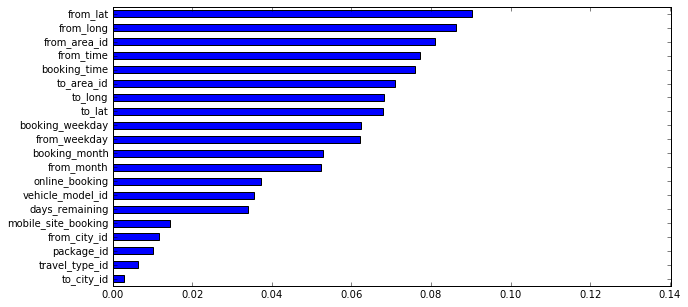

In [61]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = best_rfc.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, best_rfc.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(best_rfc, cars_train.columns, summarized_columns=categorical_variables)

<h3>Accuracy Score</h3>

In [62]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.939334637965


<h3>Classification Report</h3>

In [63]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      8073
          1       0.77      0.20      0.32       614

avg / total       0.93      0.94      0.92      8687



<h3>Confusion Matrix</h3>

In [65]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[8036   37]
 [ 490  124]]


<h3>AUC Score</h3>

In [69]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.898051614522


<h3>ROC Curve</h3>

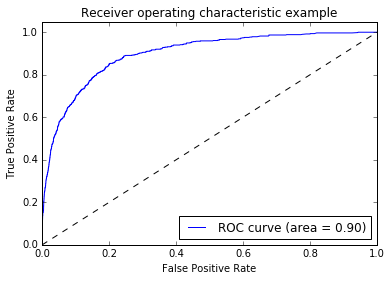

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h3>K-Fold Cross Validation</h3>

In [74]:
scores = cross_validation.cross_val_score(best_rfc, cars_train, y, cv=10)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent could happen between %f and %f' 

Score is 0.766718 +/-  0.164344
95 percent could happen between %f and %f
